In [4]:
from math import factorial, comb

import numpy as np
from matplotlib import pyplot as plt

Task 9
Let $0 \lt q \lt \frac{1}{2}$ represent the __probability of the adversary mining the next block__ and let this probability correspond to the fraction of computational power he/she possess. Let $n$ represent the number of confirmations (mined blocks) needed to consider a transaction as confirmed. Let $P(n, q)$ represent the probability that an adversary with power $q$ will mine a chain of blocks equal to or longer than the one mined by honest users at the moment when they have attached to the block containing the considered transaction $n$ blocks, or ever after.

### Model:
$T$ -- time required for generation of the next block:
- $T \sim Exp(\lambda)$
- $f_T(t) = \alpha e^{-\alpha t}$, $\alpha > 0$
- $E(T) = \frac{1}{\alpha}$

$T_k$ -- time required for generation of the $k$-th block
- $T_1, T_2, \dots$ -- independent random variables

$S_n = T_1 + T_2 + \dots + T_n$ -- time required for generation of $n$ blocks
- $S_n \sim Gamma(n, \alpha)$
- $F_{S_n}(t) = 1 - e^{-\alpha t} \sum_{k = 0}^{n - 1} \frac{(\alpha t)^k}{k!}$

$N(t) = \max\{n: S_n \leq t\}$ -- number of blocks generated by time $t$
- $S_0 = 0$
- $N(t) \Leftrightarrow	S_n \leq t \land S_{n + 1} \gt t$
- $P[N(t) = n] = P[S_n \leq t \land S_{n + 1} \gt t] = P[S_n \leq t] - P[S_{n + 1} \leq t] = F_{S_n}(t) - F_{S_{n + 1}}(t) = \frac{(\alpha t)^n}{n!}e^{-\alpha t}$
- $N(t) \sim Pois(\alpha n)$
- taking all of that into consideration, we can say that $\{N(t), t \geq 0\}$ is a Poisson process with intesity parameter $\alpha$.

### Race with the adversary:
- $T, S_n, N(t)$ -- for legitimate user
- $T', S'_n, N'(t)$ -- for adversary
- $T \sim Exp(\alpha)$ and $T' \sim Exp(\alpha')$, where $\alpha, \alpha'$ denote the computational power of the legitimate user and the adversary respectively.
- $M = min(T, T') \sim Exp(\alpha + \alpha')$
- $P[T \lt T'] = \frac{\alpha}{\alpha + \alpha'}$, thus
- $p=\frac{\alpha}{\alpha + \alpha'}$ and $q = \frac{\alpha'}{\alpha + \alpha'}$, where $p$ and $q$ denote the probability of the legitimate user and the adversary respectively.
- Typically in blockchain network it is desired to have fixed expected time for new block generation, let's call it $\tau = \frac{1}{\alpha + \alpha'}$.
$$E[T] = \frac{1}{\alpha} = \frac{\tau}{p}$$
$$E[T'] = \frac{1}{\alpha'} = \frac{\tau}{q}$$
- $E_n$ -- event of adversary of catching up with the legitimate user after $n$ blocks, let's denote probability of that event with $q_n$. $$P[E_n] = q_n = (\frac{q}{p})^n$$




### Nakamoto:
Let's denote probability of adversary caching up with the longest chain after they appended $n$ blocks or more by $P(n)$.

$$ P(n) = P[N'(S_n) \gt n] + \sum^n_{k=0}P[N'(S_n) = k] \cdot q_{n-k}. $$

Nakamoto uses the following, $N'(S_n)$ is approximated with $N'(E[S_n])$, where $E[S_n] = nE[T] = n\frac{\tau}{p}$.

$N'(E[S_n]) \sim Pois(\lambda)$, where $$\lambda = \alpha' E[S_n] = \alpha' \frac{n\tau}{p} = \frac{n q}{p}, $$ so

$$ P[N'(S_n) = k] = e^{- \lambda} \frac{\lambda^k}{k!}. $$

Notice that $q_0 = 1$, so considering all things above we can say that:

$$P(n) \approx P[N'(E[S_n]) \gt n] + \sum^n_{k=0} P[N'(E[S_n]) = k] \cdot q_{n-k} $$

$$ = 1 - \sum^n_{k=0} P[N'(E[S_n]) = k] + \sum^n_{k=0} P[N'(E[S_n]) = k] \cdot q_{n-k} $$

$$ = 1 - \sum^{n-1}_{k=0} P[N'(E[S_n]) = k] \cdot (1 - q_{n-k}) $$

$$ = 1 - \sum^{n-1}_{k=0} e^{- \lambda} \frac{\lambda^k}{k!} (1 - q_{n-k}) $$

### Grunspan:
Let $X_n$ be random variable representing number of blocks mined by the adversary at the moment when onset miners appended $n$ blocks to the longest chain. Then $X_n \sim NegBin(n, p)$

$$ P[X_n = k] = p^n q^k \binom{k + n - 1}{k} $$ and

$$ P[X_n < k] = \sum^{k}_{l=0} (p^n q^l) \binom{l + n - 1}{l}. $$

Let redefine $P(n)$ without $N'(S_n) = N'(E[S_n])$ assumption using Grunspan's approach:

$$ P(n) = 1 - \sum^{n-1}_{k=0} (p^n q^k - q^n p^k) \binom{k + n - 1}{k}. $$

__a)__ Compare the formulas for $P(n, q)$ obtained by Nakamoto and Grunspan. In particular:
− set $n = 1, 3, 6, 12, 24, 48$ and plot $P(n, q)$ depending on the value of $q$,
− set the acceptable probability of adversary success $P(n, q) = 0.1\%, 1\%, 10\%$ and draw graphs showing how to choose the value of $n$ depending on the value of $q$.

$$ P_{nakamoto}(n) = 1 - \sum^{n-1}_{k=0} e^{- \lambda} \frac{\lambda^k}{k!} (1 - q_{n-k}) $$

$$ P_{grunspan}(n) = 1 - \sum^{n-1}_{k=0} (p^n q^k - q^n p^k) \binom{k + n - 1}{k}. $$


In [5]:
def P_nakamoto(n: int, q: float):
    p = 1 - q
    lambda_ = n * q / p
    return 1 - np.sum([np.exp(-lambda_) * lambda_ ** k / factorial(k) * (1 - (q / p) ** (n - k)) for k in range(n)])

def P_grunspan(n: int, q: float):
    p = 1 - q
    return 1 - np.sum([(p ** n * q ** k - q ** n * p ** k) * comb(k + n - 1, k) for k in range(n)])

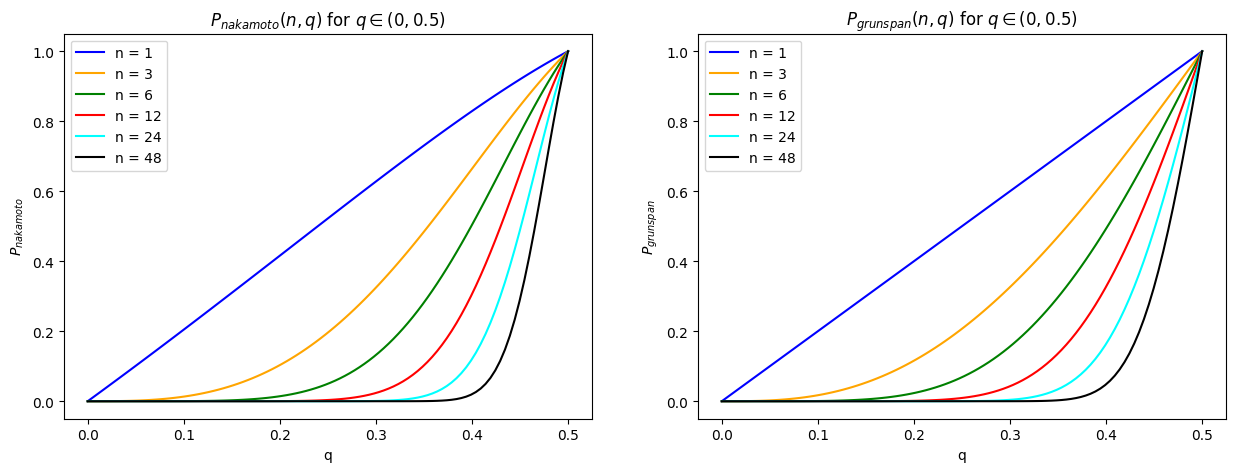

In [23]:
def subtask_a():
    colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']
    q_linspace = np.linspace(0, 0.5, 100)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for i, n in enumerate([1, 3, 6, 12, 24, 48]):
        axs[0].plot(q_linspace, [P_nakamoto(n, q) for q in q_linspace], label=f'n = {n}', color = colors[i])
        axs[1].plot(q_linspace, [P_grunspan(n, q) for q in q_linspace], label=f'n = {n}', color = colors[i])

    axs[0].set_title(r'$P_{nakamoto}(n, q)$ for $q \in (0, 0.5)$')
    axs[0].set_ylabel(r'$P_{nakamoto}$')
    axs[1].set_title(r'$P_{grunspan}(n, q)$ for $q \in (0, 0.5)$')
    axs[1].set_ylabel(r'$P_{grunspan}$')

    for ax in axs:
        ax.legend()
        ax.set_xlabel('q')
    plt.show()

subtask_a()

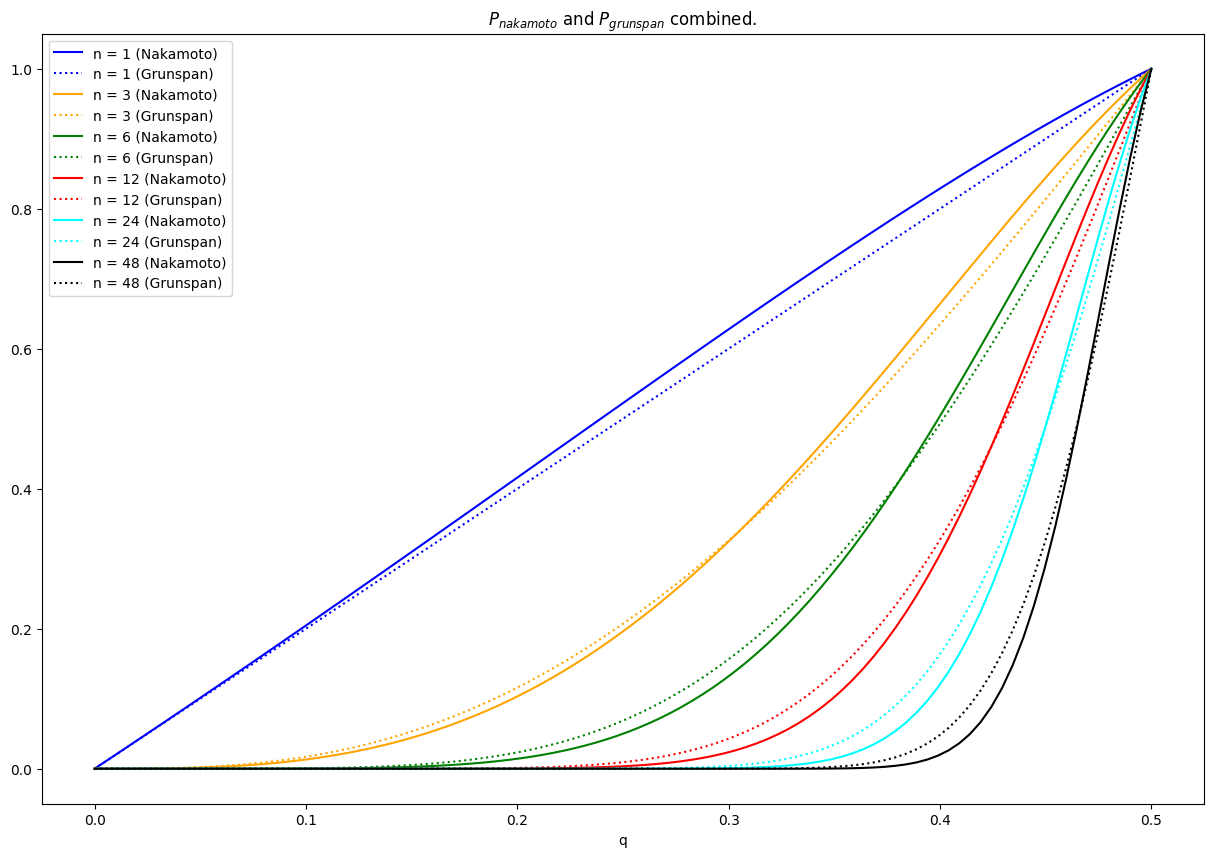

In [27]:
def subtask_a_combined():
    colors = ['blue', 'orange', 'green', 'red', 'cyan', 'black']
    q_linspace = np.linspace(0, 0.5, 100)
    fig, ax = plt.subplots(figsize=(15, 10))
    for i, n in enumerate([1, 3, 6, 12, 24, 48]):
        ax.plot(q_linspace, [P_nakamoto(n, q) for q in q_linspace], label=f'n = {n} (Nakamoto)', color = colors[i], linestyle='solid')
        ax.plot(q_linspace, [P_grunspan(n, q) for q in q_linspace], label=f'n = {n} (Grunspan)', color = colors[i], linestyle='dotted')
    ax.set_title(r'$P_{nakamoto}$ and $P_{grunspan}$ combined.')
    ax.legend()
    ax.set_xlabel('q')
    plt.show()

subtask_a_combined()

__b)__ Implement a *double spending attack* simulator, which will enable experimental approximation of the probability $P(n, q)$ depending on the values of $n$ and $q$.

__Hint__: design the experiment and repeat it multiple times (_Monte Carlo method_). <u>Carefully and thoroughly describe the idea and code of the simulator.</u>

__c)__ Compare the _simulator results_ to the _analytical results_ (__graphs__). If there are discrepancies, try to explain them.